# Homework 5
### Sungwon Lee
### 017473950

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("purchase_data1.csv")
df.head()

,customer_id,product_id,purchase_date,purchase_amount
0,GA-14725,FUR-CH-10001146,2013-02-11,60.890
1,CP-12340,FUR-TA-10004175,2013-03-17,613.908
2,MZ-17515,OFF-BI-10004140,2013-04-04,7.184
3,MH-17290,OFF-LA-10000305,2013-04-26,12.600
4,KH-16360,OFF-PA-10001560,2013-05-21,4.832


Total Purchase Amount: $16425.78
Customers with Purchase Amount > $1000.00:
Customer ID: MH-18115, Product ID: TEC-PH-10002885, Purchase Date: 2016-09-24
Customer ID: MH-18115, Product ID: TEC-PH-10002885, Purchase Date: 2016-09-24
Customer ID: JE-16165, Product ID: FUR-CH-10000454, Purchase Date: 2015-12-06
Customer ID: MH-18115, Product ID: TEC-PH-10002885, Purchase Date: 2016-09-24
Customer ID: MH-18115, Product ID: TEC-PH-10002885, Purchase Date: 2016-09-24
Customer ID: JE-16165, Product ID: FUR-CH-10000454, Purchase Date: 2015-12-06
Customer ID: RA-19915, Product ID: TEC-PH-10001795, Purchase Date: 2013-11-01


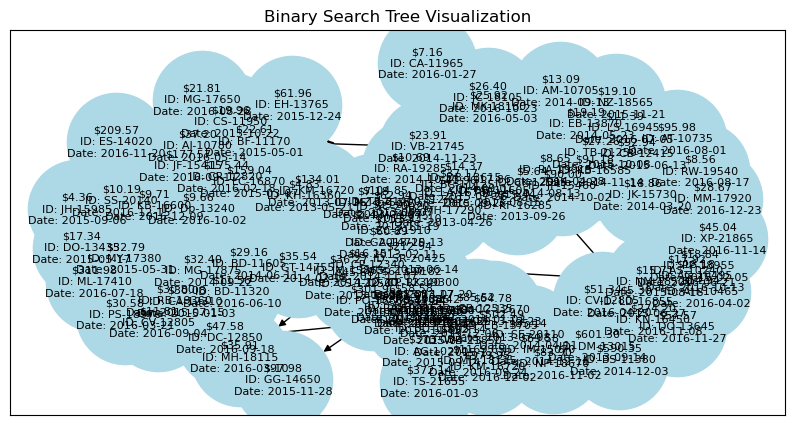

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


# root = None
# Define a class for the binary search tree node

class BSTnode:
    def __init__(self, purchase_amount, customer_id, product_id, purchase_date):
        self.purchase_amount = purchase_amount
        self.customer_id = customer_id
        self.product_id = product_id
        self.purchase_date = purchase_date
        self.left = None
        self.right = None

# Function to insert a node into the binary search tree
def insert(node, purchase_amount, customer_id, product_id, purchase_date):
    if node is None:
        return BSTnode(purchase_amount, customer_id, product_id, purchase_date)

    if purchase_amount < node.purchase_amount:
        node.left = insert(node.left, purchase_amount, customer_id, product_id, purchase_date)
    else:
        node.right = insert(node.right, purchase_amount, customer_id, product_id, purchase_date)

    return node

# In-order traversal to calculate total purchase amount
def calculate_total_purchase_amount(node):
    if node is None:
        return 0

    return node.purchase_amount + calculate_total_purchase_amount(node.left) + calculate_total_purchase_amount(node.right)

# In-order traversal to find and display customers with a purchase amount above the threshold
def find_customers_above_threshold(node, threshold):
    if node is None:
        return
    
    find_customers_above_threshold(node.left, threshold)
    
    if node:
        find_customers_above_threshold(node.left, threshold)
        if node.purchase_amount > threshold:
            print(f"Customer ID: {node.customer_id}, Product ID: {node.product_id}, Purchase Date: {node.purchase_date}")
        find_customers_above_threshold(node.right, threshold)

# Function to create a networkx graph from the binary search tree
def build_tree_graph(node, graph=None, pos=None, x=0, y=0, layer=1):
    if graph is None:
        graph = nx.DiGraph()
    if pos is None:
        pos = {node: (x, -y)}

    if node:
        graph.add_node(node, label=f"${node.purchase_amount:.2f}\nID: {node.customer_id}\nDate: {node.purchase_date}")
        if node.left:
            graph.add_edge(node, node.left)
            left_pos = (x - 1 / 2 ** layer, -y - 1)
            pos[node.left] = left_pos
            build_tree_graph(node.left, graph, pos, x - 1 / 2 ** layer, y - 1, layer + 1)
        if node.right:
            graph.add_edge(node, node.right)
            right_pos = (x + 1 / 2 ** layer, -y - 1)
            pos[node.right] = right_pos
            build_tree_graph(node.right, graph, pos, x + 1 / 2 ** layer, y - 1, layer + 1)

    return graph

# Read and parse the CSV dataset
def read_csv(filename):
    try:
        data = pd.read_csv(filename)
        return data
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse '{filename}'. Please check the file format.")
        return None

# Main function
def main():
    filename = "purchase_data1.csv"  # Change to your dataset filename
    threshold = float(input("Enter the purchase amount threshold: "))

    # Initialize the root of the binary search tree
    root = None

    # Read and parse the CSV dataset
    dataset = read_csv(filename)
    if dataset is None:
        return

    # Build the binary search tree
    for index, row in dataset.iterrows():
        root = insert(root, row['purchase_amount'], row['customer_id'], row['product_id'], row['purchase_date'])

    # Calculate and display the total purchase amount
    total_purchase_amount = calculate_total_purchase_amount(root)
    print(f"Total Purchase Amount: ${total_purchase_amount:.2f}")

    # Find and display customers with a purchase amount above the threshold
    print(f"Customers with Purchase Amount > ${threshold:.2f}:")
    find_customers_above_threshold(root, threshold)

    # Create a networkx graph from the binary search tree
    tree_graph = build_tree_graph(root)

    # Draw the tree using matplotlib
    plt.figure(figsize=(10, 5))
    pos = nx.spring_layout(tree_graph)  # Position nodes in a tree-like layout
    labels = nx.get_node_attributes(tree_graph, 'label')
    nx.draw_networkx(tree_graph, pos, labels=labels, with_labels=True, node_size=5000, node_color='lightblue', font_size=8)
    plt.title("Binary Search Tree Visualization")
    plt.show()

if __name__ == "__main__":
    main()


### Program Functionality and Implementation Report

#### Program's Functionality and the role for each function:

The provided Python script implements a binary search tree (BST) for analyzing a dataset of purchases. The primary functionalities include:

1. **BST Node Definition:**
   - The `BSTnode` class defines a node structure for the binary search tree, containing information about purchase details.

2. **Insertion Operation:**
   - The `insert` function inserts nodes into the BST based on the purchase amount.

3. **Total Purchase Amount Calculation:**
   - The `calculate_total_purchase_amount` function performs an in-order traversal to calculate the total purchase amount.

4. **Finding Customers Above a Threshold:**
   - The `find_customers_above_threshold` function conducts an in-order traversal to identify and display customers with a purchase amount above a specified threshold.

5. **Graphical Representation:**
   - The `build_tree_graph` function utilizes the NetworkX library to construct a directed graph representing the binary search tree.
   - Matplotlib is then used to visualize the tree.

6. **CSV Data Reading:**
   - The `read_csv` function reads and parses a CSV dataset, handling potential errors like file not found or empty data.

7. **Main Function:**
   - The `main` function orchestrates the entire process, prompting the user for a purchase amount threshold, reading the CSV dataset, building the BST, calculating total purchase amount, finding customers above the threshold, and visualizing the BST.

#### Approach taken for Binary Search Tree Implementation:

**Node Insertion:**
  - The script follows a recursive approach for node insertion based on the purchase amount.
  - If the current node is None, a new node is created; otherwise, the insertion process continues in either the left or right subtree based on the purchase amount.

**In-Order Traversal:**
  - In-order traversals are utilized for calculating the total purchase amount and finding customers above the threshold.
  - These traversals ensure that nodes are visited in ascending order based on the purchase amount.

**Graph Construction:**
  - The `build_tree_graph` function constructs a directed graph using the NetworkX library. It assigns positions to nodes for visualization.

#### Challenges Faced During Implementation:

  - Construct a binary search tree node visualization in a simple and readable form was the challenge I faced. It was not able to be optimized.

